In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

# DWT

- [coeficientes da wikipedia:](http://en.wikipedia.org/wiki/Cohen-Daubechies-Feauveau_wavelet)


In [2]:
import numpy as np

def wave1d (f,freq=0,inv=0,coeff=0):

    r,c = f.shape
    g = np.zeros((r,c+8))

    g[:, 4:c+4] = f
    g[:,-4:] = f[:,-2:-6:-1]
    g[:, :4] = f[:,4:0:-1]   
        
    if coeff==0: #CDF 5/3
        if inv==0: #Transformada
            if freq==0: #LOW
                s = np.array([0, 0, -1.0/8.0, 2.0/8.0, 6.0/8.0])
            else:       #HIGH
                s = np.array([0, 0, 0, -1.0/2.0, 1.0])
        else: #Inversa
            if freq==0: #LOW
                s = np.array([0, 0, 0, 1.0/2.0, 1.0])                            
            else:       #HIGH
                s = np.array([0, 0, -1.0/8.0, -2.0/8.0, 6.0/8.0])

    else: #CDF 9/7
        if inv==0: #Transformada                       
            if freq==0: #LOW
                s = np.array([0.02674875741080976,-0.01686411844287495,-0.07822326652898785,0.2668641184428723,0.6029490182363579])
            else:       #HIGH
                s = np.array([0.0                , 0.09127176311424948,-0.05754352622849957,-0.5912717631142470,1.115087052456994])
        else: #Inversa
            if freq==0: #LOW
                s = np.array([0.0                ,-0.09127176311424948,-0.05754352622849957,0.5912717631142470,1.115087052456994])
            else:       #HIGH
                s = np.array([0.02674875741080976, 0.01686411844287495,-0.07822326652898785,-0.2668641184428723,0.6029490182363579])

    h = np.empty((r,c))
    h =  s[0] * g[:,0:-8] + \
         s[1] * g[:,1:-7] + \
         s[2] * g[:,2:-6] + \
         s[3] * g[:,3:-5] + \
         s[4] * g[:,4:-4] + \
         s[3] * g[:,5:-3] + \
         s[2] * g[:,6:-2] + \
         s[1] * g[:,7:-1] + \
         s[0] * g[:,8:]
    return h[:,:c]

In [3]:
def wave2d (f,coeff=0, it=0):

    r,c = f.shape

    h = np.empty(f.shape)
    h[:,:c//2] = wave1d(f,0,0,coeff)[:,1::2]
    h[:,c//2:] = wave1d(f,1,0,coeff)[:,::2]

    g = np.empty(f.shape)
    g[:r//2,:] = np.transpose(wave1d(np.transpose(h),0,0,coeff)[:,1::2])
    g[r//2:,:] = np.transpose(wave1d(np.transpose(h),1,0,coeff)[:,::2])

    if it==0:
        return g
    else:
        g[:c//2,:r//2] = wave2d(g[:c//2,:r//2],coeff, it-1)
        return g


In [4]:
def itwave1d (f,coeff=0):

    r,c = f.shape
    rec = np.empty((c,r))

    recl = np.zeros((c,r))
    recl[:,1::2] = np.transpose(f)[:,:r//2]
    recl = wave1d(recl,0,1,coeff)

    rech = np.zeros((c,r))
    rech[:,::2] = np.transpose(f)[:,r//2:]
    rech = wave1d(rech,1,1,coeff)

    rec = recl + rech

    return rec
    

In [5]:
def iwave2d (f,coeff=0,it=0):
    r,c = f.shape

    if it>0:
        f[:c//2,:r//2] = iwave2d(f[:c//2,:r//2],coeff,it-1)

    rect = np.empty((c,r))
    rect = itwave1d(f,coeff) # filtro na vertical

    rec = np.empty((r,c))
    rec = itwave1d(rect,coeff) # filtro na horizontal

    return rec

## Wavelet CDF5/3

(256, 256)


""
Input Image

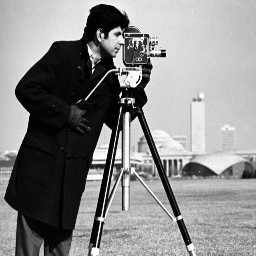

In [6]:
f = mpimg.imread('../data/cameraman.tif')
#f = f[:-1,:-1]

print(f.shape)

ia.adshow(f,'Input Image')

(256, 256)


""
Transformada wavelet CDF 5/3

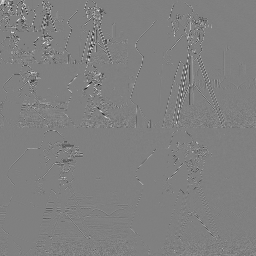

""
Imagem reconstruida CDF 5/3

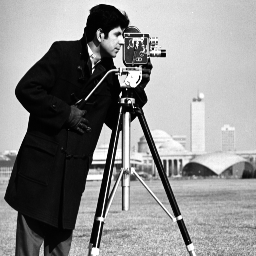

Maximo diferenca CDF 5/3 0.0


In [7]:
print(f.shape)
g = wave2d(f,0,5)
ia.adshow(ia.normalize(g),'Transformada wavelet CDF 5/3')

rec = iwave2d(g,0,5)
ia.adshow(ia.normalize(rec),'Imagem reconstruida CDF 5/3')

print('Maximo diferenca CDF 5/3', np.abs(f-rec).max())

## Wavelet CDF9/7

(256, 256)


""
Transformada wavelet CDF 9/7

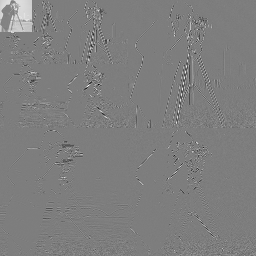

""
Imagem reconstruida CDF 9/7

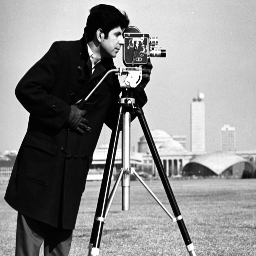

Maximo diferenca CDF 9/7 1.65698565979e-11


In [8]:
print(f.shape)

g = wave2d(f,1,2)
ia.adshow(ia.normalize(g),'Transformada wavelet CDF 9/7')

rec = iwave2d(g,1,2)
ia.adshow(ia.normalize(rec),'Imagem reconstruida CDF 9/7')

print('Maximo diferenca CDF 9/7', np.abs(f-rec).max())

## Espectro dos Filtros CDF

0.14375
0.5


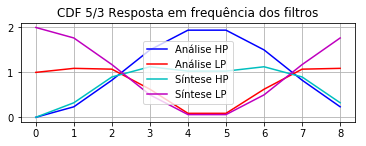

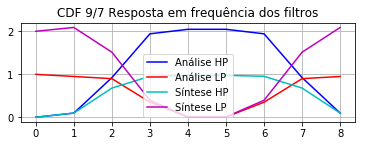

In [9]:
#tcdf_53_lf = np.array([0    ,  0    , -1.0/8.0,  2.0/8.0, 6.0/8.0,  2.0/8.0, -1.0/8.0,  0    , 0    ])
#tcdf_53_hf = np.array([0    ,  0    ,        0, -1.0/2.0, 1.0    , -1.0/2.0,        0,  0    , 0    ])
#icdf_53_lf = np.array([0    ,  0    ,        0,  1.0/2.0, 1.0    ,  1.0/2.0,        0,  0    , 0    ])
#icdf_53_hf = np.array([0    ,  0    , -1.0/8.0, -2.0/8.0, 6.0/8.0, -2.0/8.0, -1.0/8.0,  0    , 0    ])
#tcdf_97_lf = np.array([0.027, -0.017,   -0.078,    0.267,   0.603,    0.267,   -0.078, -0.017, 0.027])
#tcdf_97_hf = np.array([0.0  ,  0.091,   -0.056,   -0.591,   1.115,   -0.591,   -0.056,  0.091, 0.0  ])
#icdf_97_lf = np.array([0.0  , -0.091,   -0.056,    0.591,   1.115,    0.591,   -0.056, -0.091, 0.0  ])
#icdf_97_hf = np.array([0.027,  0.017,   -0.078,   -0.267,   0.603,   -0.267,   -0.078,  0.017, 0.027])

tcdf_53_lf = np.array([-1.0/8.0,  2.0/8.0,  6.0/8.0,  2.0/8.0, -1.0/8.0, 0, 0, 0, 0])
tcdf_53_hf = np.array([-1.0/2.0,  1.0    , -1.0/2.0,  0      ,  0      , 0, 0, 0, 0])
icdf_53_lf = np.array([ 1.0/2.0,  1.0    ,  1.0/2.0,  0      ,  0      , 0, 0, 0, 0])
icdf_53_hf = np.array([-1.0/8.0, -2.0/8.0,  6.0/8.0, -2.0/8.0, -1.0/8.0, 0, 0, 0, 0])

tcdf_97_lf = np.array([ 0.027, -0.017, -0.078,  0.267,  0.603,  0.267, -0.078, -0.017, 0.027])
tcdf_97_hf = np.array([ 0.091, -0.056, -0.591,  1.115, -0.591, -0.056,  0.091,  0.0  , 0    ])
icdf_97_lf = np.array([-0.091, -0.056,  0.591,  1.115,  0.591, -0.056, -0.091,  0.0  , 0    ])
icdf_97_hf = np.array([ 0.027,  0.017, -0.078, -0.267,  0.603, -0.267, -0.078,  0.017, 0.027])

print(np.sum(np.abs(tcdf_53_lf)*np.abs(tcdf_53_lf))/5)
print(np.sum(np.abs(tcdf_53_hf)*np.abs(tcdf_53_hf))/3)

Tcdf_53_lf = np.fft.fft(tcdf_53_lf)
Tcdf_53_hf = np.fft.fft(tcdf_53_hf)
Icdf_53_lf = np.fft.fft(icdf_53_lf)
Icdf_53_hf = np.fft.fft(icdf_53_hf)
Tcdf_97_lf = np.fft.fft(tcdf_97_lf)
Tcdf_97_hf = np.fft.fft(tcdf_97_hf)
Icdf_97_lf = np.fft.fft(icdf_97_lf)
Icdf_97_hf = np.fft.fft(icdf_97_hf)

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.abs(Tcdf_53_hf),'b', label = 'Análise HP') 
plt.plot(np.abs(Tcdf_53_lf),'r', label = 'Análise LP')
plt.plot(np.abs(Icdf_53_hf),'c', label = 'Síntese HP') 
plt.plot(np.abs(Icdf_53_lf),'m', label = 'Síntese LP')      
plt.grid(True)
plt.legend()
plt.title('CDF 5/3 Resposta em frequência dos filtros')

fig = plt.figure()
plt.subplot(2, 1, 2)
plt.plot(np.abs(Tcdf_97_hf),'b', label = 'Análise HP') 
plt.plot(np.abs(Tcdf_97_lf),'r', label = 'Análise LP')
plt.plot(np.abs(Icdf_97_hf),'c', label = 'Síntese HP') 
plt.plot(np.abs(Icdf_97_lf),'m', label = 'Síntese LP')
plt.grid(True)
plt.legend()
plt.title('CDF 9/7 Resposta em frequência dos filtros')

## Espectro da imagem

""
"f: Input, mean: 137.07"
""
F: DFT da original

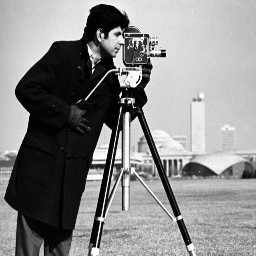
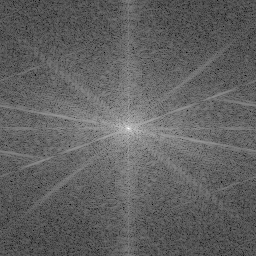

""
lowf: passa baixas mean: 137.07
""
Flow: DFT da passa baixas horizontal

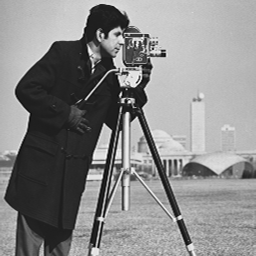
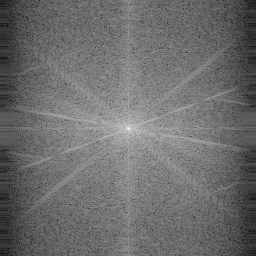

""
highf: Imagem com filto passa altas mean: -0.01
""
Fhigh: DFT da passa altas horizontal

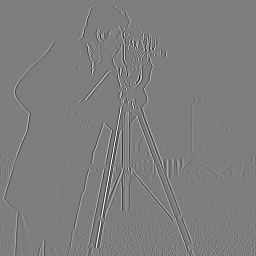
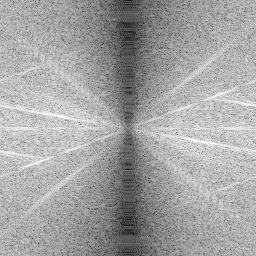

In [15]:
nb = ia.nbshow(2)
nb.nbshow(f,'f: Input, mean: %3.2f' % (np.mean(f),))

F  = np.fft.fft2(f)
nb.nbshow(ia.dftview(F), "F: DFT da original")
nb.nbshow()

r,c = f.shape

lowf  = wave1d(f,0,0,0)
nb.nbshow(ia.normalize(lowf) ,'lowf: passa baixas mean: %3.2f' % (np.mean(lowf),))
Flow = np.fft.fft2(lowf)
nb.nbshow(ia.dftview(Flow), "Flow: DFT da passa baixas horizontal")
nb.nbshow()

highf = wave1d(f,1,0,0)
nb.nbshow(ia.normalize(highf),'highf: Imagem com filto passa altas mean: %3.2f' % (np.mean(highf),))
Fhigh = np.fft.fft2(highf)
nb.nbshow(ia.dftview(Fhigh), "Fhigh: DFT da passa altas horizontal")
nb.nbshow()


## Espectro da imagem apos transformada wavelet

""
DFT imagem com FPB

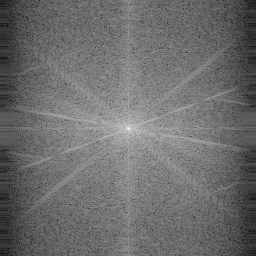

""
DFT imagem com FPA

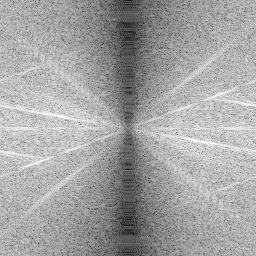

""
DFT imagem com FPB decimada

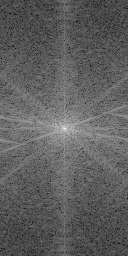

""
DFT imagem com FPA decimada

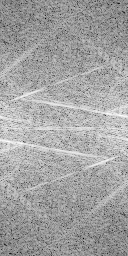

In [15]:
LF  = np.fft.fft2(lowf)
ia.adshow(ia.dftview(LF), "DFT imagem com FPB")

HF  = np.fft.fft2(highf)
ia.adshow(ia.dftview(HF), "DFT imagem com FPA")

LFD = np.fft.fft2(lowf[:,::2])
ia.adshow(ia.dftview(LFD), "DFT imagem com FPB decimada")

HFD  = np.fft.fft2(highf[:,1::2])
ia.adshow(ia.dftview(HFD), "DFT imagem com FPA decimada")

## Espectro da reconstrucao da imagem

""
recl: DFT imagem com FPB e zeros

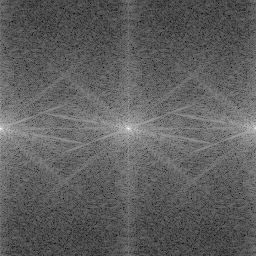

""
rech: DFT imagem com FPA e zeros

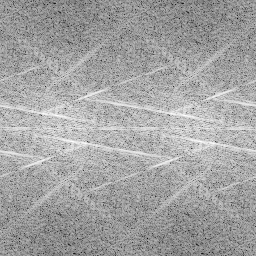

""
"recl: DFT imagem com FPB, zeros e FPB"

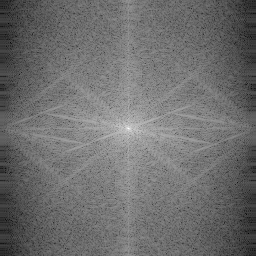

""
"rech: DFT imagem com FPA, zeros e FPA"

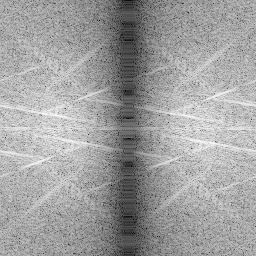

In [16]:
recl = np.zeros((r,c))
recl[:,::2] = lowf[:,::2]

rech = np.zeros((r,c))
rech[:,1::2] = highf[:,1::2]

LFZ = np.fft.fft2(recl)
ia.adshow(ia.dftview(LFZ), "recl: DFT imagem com FPB e zeros")

HFZ = np.fft.fft2(rech)
ia.adshow(ia.dftview(HFZ), "rech: DFT imagem com FPA e zeros")

recl = wave1d(recl,0,1,0)
rech = wave1d(rech,1,1,0)

LFZ = np.fft.fft2(recl)
ia.adshow(ia.dftview(LFZ), "recl: DFT imagem com FPB, zeros e FPB")

HFZ = np.fft.fft2(rech)
ia.adshow(ia.dftview(HFZ), "rech: DFT imagem com FPA, zeros e FPA")

## Imagem reconstruida

""
"DFT imagem com FPA, zeros e FPA"

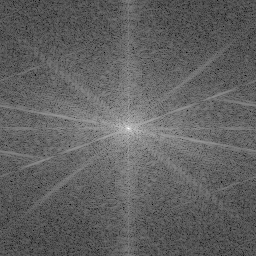

""
Imagem com filto passa altas - FPA

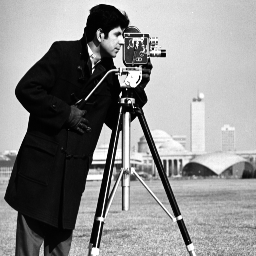

Maximo diferenca CDF 5/3 0.0


In [17]:
rec = recl + rech

FF = np.fft.fft2(rec)
ia.adshow(ia.dftview(FF), "DFT imagem com FPA, zeros e FPA")

ia.adshow(ia.normalize(rec),'Imagem com filto passa altas - FPA')

print('Maximo diferenca CDF 5/3', np.abs(f-rec).max())

#adshow(ia.iaplot(np.abs(F), ylabel='n. de pixels', xlabel='niveis de cinza'), 'FFT 1d da imagem')